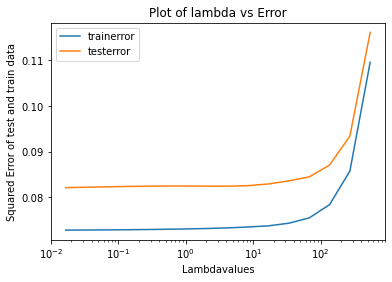

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df_train = pd.read_table("crime-train.txt")
df_test = pd.read_table("crime-test.txt")
n=1595
d=96
y=np.zeros(n)
X=df_train.drop('ViolentCrimesPerPop',axis=1).values
y=df_train['ViolentCrimesPerPop'].values
Xtest=df_test.drop('ViolentCrimesPerPop',axis=1).values
ytest=df_test['ViolentCrimesPerPop'].values
lambdaa=np.zeros(d)
W=np.zeros(d-1)
count1=[]
lambda1=[]
converged=True
sum=0;
trainerror=[]
testerror=[]

for i in range(1595):
    sum=sum+y[i]
sum=sum/1595

#calculating the lambdamax
for k in range(95):
    lam=0
    for i in range(1595):
        lam=2*df_train.iloc[i][k+1]*(y[i]-sum)+lam
    lambdaa[k]=np.linalg.norm(lam)
lambdamax=np.max(lambdaa)

#Looping over all the lambdas
while lambdamax>0.01:
    ak=np.zeros(d-1)
    b=np.zeros(n)
    ck=np.zeros(d-1)
    check=np.zeros(d-1)
    epsilon=np.zeros(d-1)
    converged=False    
    
    # convergence loop 
    while not converged:
        b=np.sum(y-np.dot(X,W.T))
        b=b/n
        check[:]=W
        
        #Lopping over all columns
        for k in range(d-1):
            Xk=X[:,k]
            Xj=np.delete(X,k, axis=1)
            Wj=np.delete(W,k,axis=0)
            ak=2*np.sum(np.square(Xk))
            ck=2*np.sum(np.dot(Xk.T,(y-(b+np.dot(Xj,Wj.T)))))         
            if ck<-lambdamax:
                W[k]=(ck+lambdamax)/ak
            elif ck >= -lambdamax and ck <= lambdamax:
                W[k]=0
            else:
                W[k]=(ck-lambdamax)/ak
                
        #checking the convergence rule       
        epsilon=np.absolute(np.array(W) - np.array(check))
        converged=True
        
        for i in range(d-1):
            if epsilon[i]>0.01:
                converged=False
                break  
        
    #collecting training and test error  
    tr_error=np.sum((y-np.dot(X,W))**2)/1595             # dividing by number of train_samples
    te_error=np.sum((ytest-np.dot(Xtest,W))**2)/399      # dividing by number of test_samples
    lambda1.append(lambdamax)
    lambdamax=lambdamax/2
    trainerror.append(tr_error)
    testerror.append(te_error)

    
plt.semilogx(lambda1,trainerror,label='trainerror') 
plt.semilogx(lambda1,testerror,label='testerror')
plt.xlabel('Lambdavalues')
plt.ylabel('Squared Error of test and train data')
plt.title("Plot of lambda vs Error")
plt.legend()
